# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append(
            {
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date,
            }
        )

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | west island
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | adamstown
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | ceelbuur
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | portland
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | ceyranbatan
Processing Record 11 of Set 1 | alo
Processing Record 12 of Set 1 | alvaraes
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tugulym
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | margaret river
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | luza
Processing Record 20 of Set 1 | jilma
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | port-aux-francais
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,west island,-12.1568,96.8225,27.99,78,75,7.72,CC,1699180228
1,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,79,75,5.36,RU,1699180369
2,adamstown,-25.0660,-130.1015,22.27,76,96,6.69,PN,1699180370
3,puerto ayora,-0.7393,-90.3518,24.75,90,78,3.13,EC,1699180372
4,ceelbuur,4.6850,46.6176,31.03,54,99,1.91,SO,1699180373


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.99,78,75,7.72,CC,1699180228
1,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,79,75,5.36,RU,1699180369
2,adamstown,-25.0660,-130.1015,22.27,76,96,6.69,PN,1699180370
3,puerto ayora,-0.7393,-90.3518,24.75,90,78,3.13,EC,1699180372
4,ceelbuur,4.6850,46.6176,31.03,54,99,1.91,SO,1699180373


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

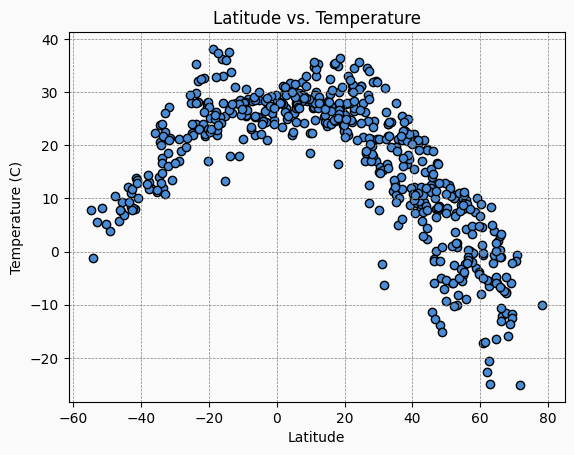

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
# Set the color scheme
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"
plt.rcParams["grid.color"] = "#cccccc"
plt.scatter(latitude, temperature, color="#488bd6", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("Latitude vs. Temperature")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

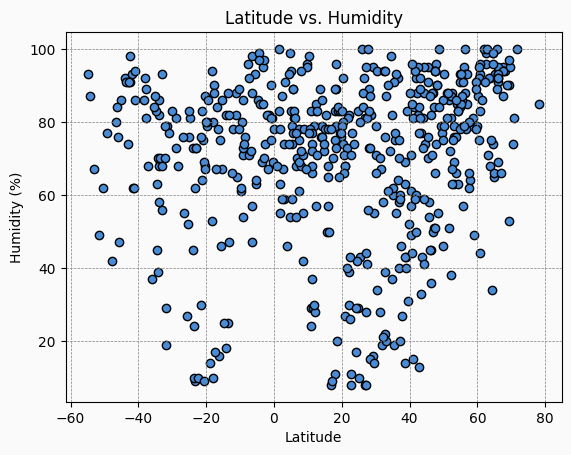

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
latitude = city_data_df["Lat"]
temperature = city_data_df["Humidity"]

# Set the color scheme
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"
plt.rcParams["grid.color"] = "#cccccc"
plt.scatter(latitude, temperature, color="#488bd6", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

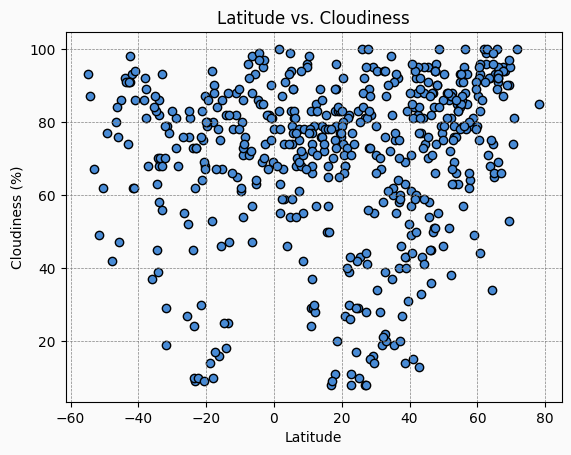

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Set the color scheme
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"
plt.rcParams["grid.color"] = "#cccccc"
plt.scatter(latitude, temperature, color="#488bd6", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")

# Enable grid lines
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

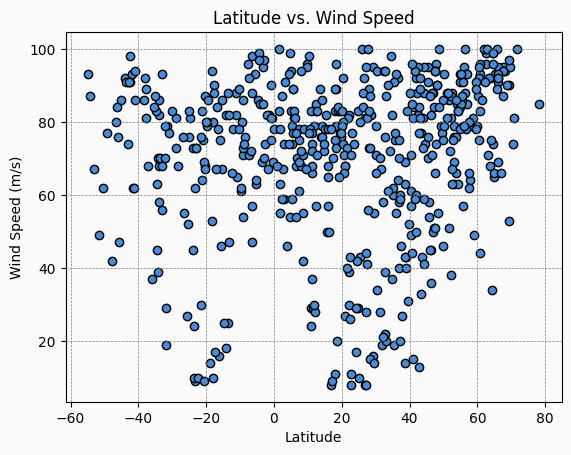

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

# Set the color scheme
plt.rcParams["figure.facecolor"] = "#fafafa"
plt.rcParams["axes.facecolor"] = "#fafafa"
plt.rcParams["grid.color"] = "#cccccc"
plt.scatter(latitude, temperature, color="#488bd6", edgecolor="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Enable grid lines
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x, y, x_label, y_label, title, save_path=None):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color="#488bd6", edgecolor="black", label="Data Points")

    # Plot the regression line
    plt.plot(x, slope * x + intercept, color="red",
             label="Linear Regression Line")

    # Incorporate graph properties
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Save the figure if a save_path is provided
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,petropavlovsk-kamchatsky,53.0452,158.6483,0.81,79,75,5.36,RU,1699180369
4,ceelbuur,4.6850,46.6176,31.03,54,99,1.91,SO,1699180373
5,pacific grove,36.6177,-121.9166,14.12,92,100,2.06,US,1699180374
6,san patricio,28.0170,-97.5169,19.91,89,100,2.15,US,1699180376
7,portland,45.5234,-122.6762,12.48,95,20,3.60,US,1699180181


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,west island,-12.1568,96.8225,27.99,78,75,7.72,CC,1699180228
2,adamstown,-25.0660,-130.1015,22.27,76,96,6.69,PN,1699180370
3,puerto ayora,-0.7393,-90.3518,24.75,90,78,3.13,EC,1699180372
11,alvaraes,-3.2208,-64.8042,24.30,95,54,0.34,BR,1699180384
12,ushuaia,-54.8000,-68.3000,7.81,93,20,5.14,AR,1699180334


###  Temperature vs. Latitude Linear Regression Plot

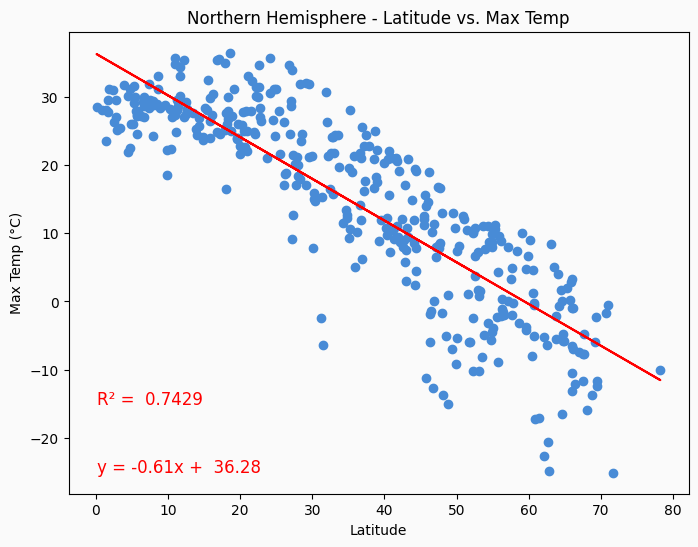

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Assuming you have a DataFrame named northern_hemi_df with "Latitude" and "Max Temp" columns

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, color="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.title("Northern Hemisphere - Latitude vs. Max Temp")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)


# Save the figure
plt.savefig("../output_data/Northern_Hemi_Regression.png")

# Show the plot
plt.show()

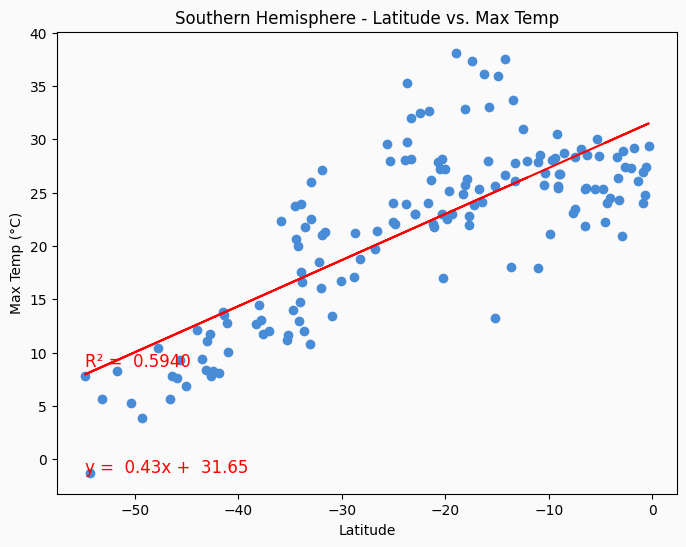

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

# Assuming you have a DataFrame named southern_hemi_df with "Latitude" and "Max Temp" columns

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (°C)")
plt.title("Southern Hemisphere - Latitude vs. Max Temp")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)


# Save the figure
plt.savefig("../output_data/Southern_Hemi_Regression.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

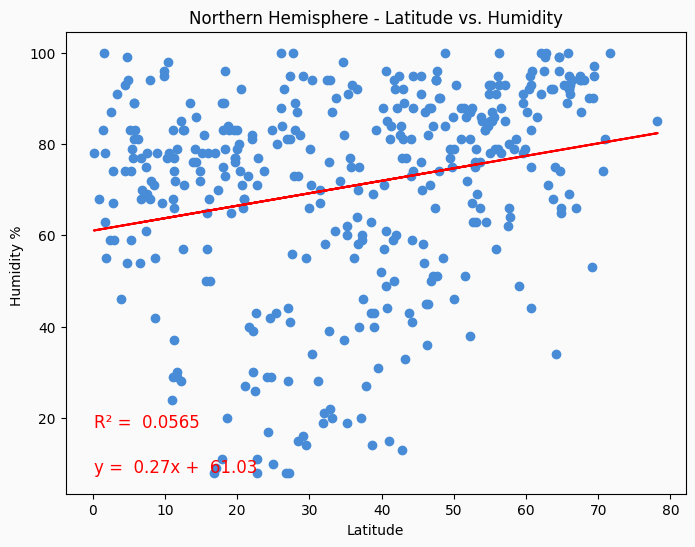

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
# Assuming you have a DataFrame named southern_hemi_df with "Latitude" and "Max Temp" columns

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity % ")
plt.title("Northern Hemisphere - Latitude vs. Humidity")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Regression.png")

# Show the plot
plt.show()

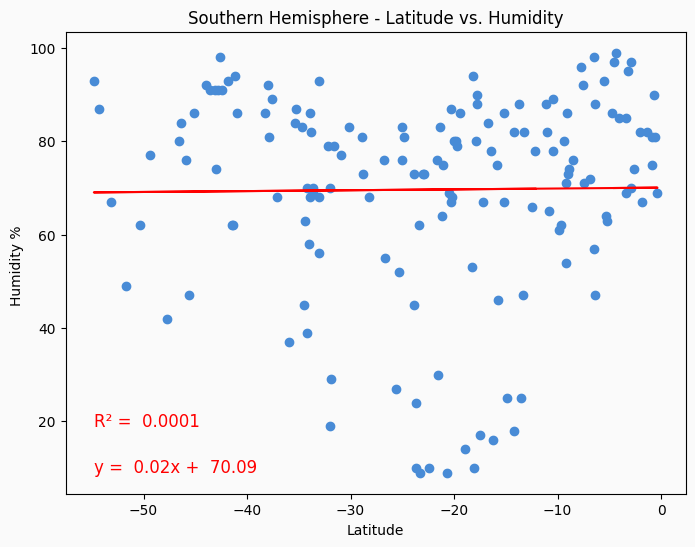

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
# Assuming you have a DataFrame named southern_hemi_df with "Latitude" and "Max Temp" columns

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity % ")
plt.title("Southern Hemisphere - Latitude vs. Humidity")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)


# Save the figure
plt.savefig("../output_data/Southern_Hemi_Regression.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

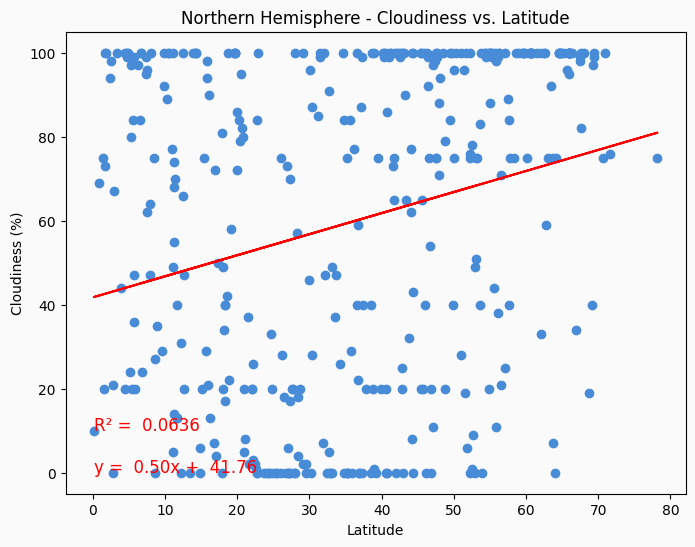

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

# Assuming you have a DataFrame named northern_hemi_df with "Latitude" and "Cloudiness" columns

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)


# Save the figure
plt.savefig("../output_data/Northern_Hemi_Cloudiness_vs_Latitude_Regression.png")

# Show the plot
plt.show()

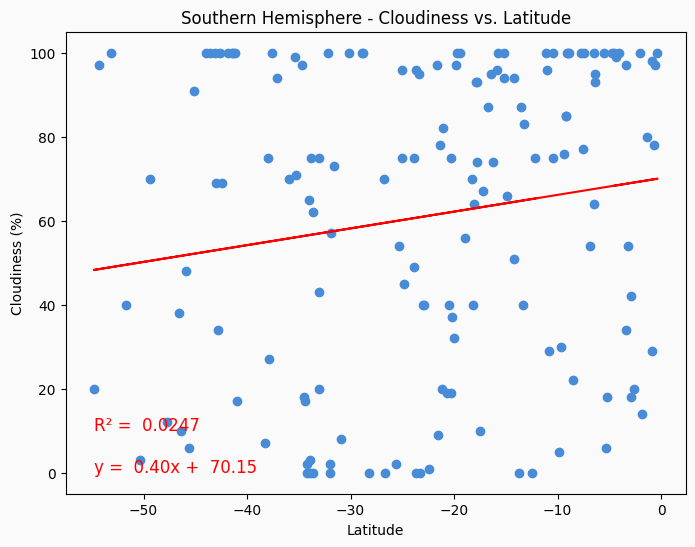

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
# Assuming you have a DataFrame named southern_hemi_df with "Latitude" and "Cloudiness" columns

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 10),
    fontsize=12,
    color="red",
)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Cloudiness_vs_Latitude_Regression.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

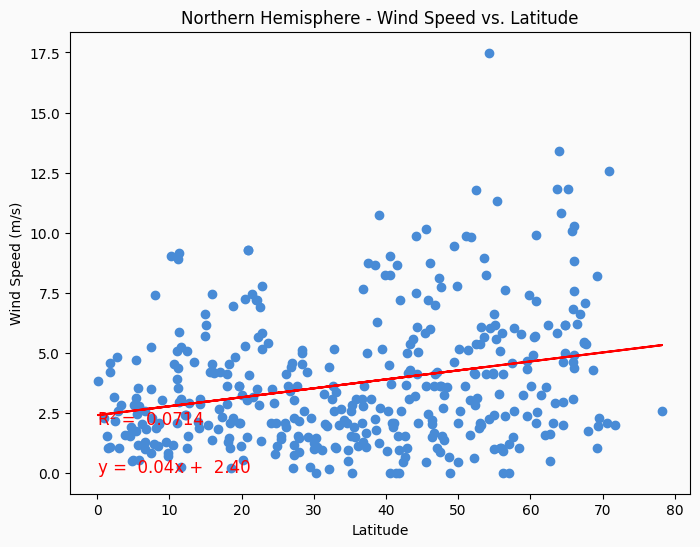

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

# Assuming you have a DataFrame named northern_hemi_df with "Latitude" and "Wind Speed" columns

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 2),
    fontsize=12,
    color="red",
)

# Save the figure
plt.savefig("../output_data/Northern_Hemi_Wind_Speed_vs_Latitude_Regression.png")

# Show the plot
plt.show()

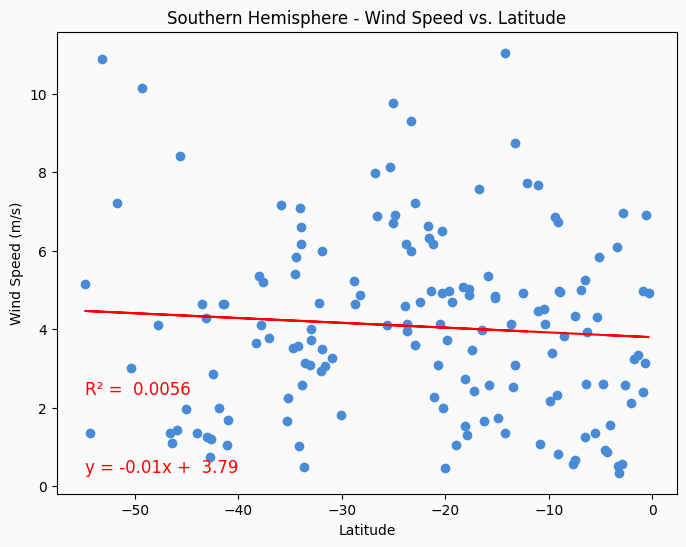

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

# Assuming you have a DataFrame named southern_hemi_df with "Latitude" and "Wind Speed" columns

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Calculate the regression line
regress_line = slope * x_values + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c="#488bd6")

# Plot the regression line
plt.plot(x_values, regress_line, color="red")

# Incorporate graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

# Show the regression equation on the plot
plt.annotate(
    f"y = {slope: .2f}x + {intercept: .2f}",
    (x_values.min(), y_values.min()),
    fontsize=12,
    color="red",
)

# Display the R-squared value
plt.annotate(
    f"R² = {r_value**2: .4f}",
    (x_values.min(), y_values.min() + 2),
    fontsize=12,
    color="red",
)

# Save the figure
plt.savefig("../output_data/Southern_Hemi_Wind_Speed_vs_Latitude_Regression.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE